# **PROJECT NAME** --> Amazon Prime TV Shows and Movies Using Python EDA

### **Project Type** --> EDA (Exploratory Data Analysis)

### **Contribution** --> Individual

# **PROJECT SUMMARY**

#### The main goal of this project will be to analyze the Amazon Prime Titles and Credits datasets to understand the overall content structure and identify key patterns. Before starting the work, the data will be observed to contain missing values, inconsistent formats, and scattered information across two separate files. The objective will be to combine both datasets, clean the data, and prepare it for proper exploration.

#### After merging the Titles and Credits data using the id column, the project will focus on studying important aspects such as release years, genres, ratings, popularity, cast information, and content types. Feature engineering will also be performed to create useful new columns like decade, genre lists, and primary genre.

#### The final aim of the project will be to generate meaningful visualizations, derive valuable insights, and provide business-focused recommendations. This summary will set the foundation for the complete EDA that will follow.

# **GITHUB LINK** --

#### This is my GitHub Profile Link (Repositories)
https://github.com/shabbu8111999?tab=repositories

#### This is my Labmentix Internship GitHub Link

# **PROBLEM STATEMENT** --

#### The purpose of this project is to analyze the dataset of shows and movies available on Amazon Prime Video and understand how the platform’s content is structured.
#### 1. Content Diversity :- What genres and category dominate the Platform?
#### 2. Regional Availability :- How does content ditribution vary across different regions?
#### 3. Trends Over Time :- How has Amazon Prime Content Library evolved?
#### 4. IMDb Ratings and Popularity :- What are the highest rated and most popular shows on the platform?

#### By analyzing this dataset, businesses, content creators and data analysts can uncover key trends that influence subscription growth, user engagement and content investment strategies in the Streaming industry.

# **KNOW YOUR DATA**

### **Import Libraries**

In [1]:
# These are the Libraries i will use for EDA if needed someother libraries i will add upon in this section

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The warning package is used to ignore the warning message appears with output.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Safe Settings to plot and load the data
plt.style.use('ggplot')
pd.set_option("display.max_columns", None)

### **Dataset Loading**

In [3]:
title_df = pd.read_csv(r"C:\Users\H P\Desktop\Labmentix Projects\EDA_Amazon_Project\titles.csv", encoding='utf-8')
credit_df = pd.read_csv(r"C:\Users\H P\Desktop\Labmentix Projects\EDA_Amazon_Project\credits.csv", encoding='utf-8')

#### It reads the titles.csv and credits.csv file's from the system and loads it into a pandas DataFrame. Here encoding='utf-8' ensures the text characters are read correctly.

### **Dataset First Look**

In [4]:
# This the Whole Dataset First Look
title_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [5]:
# this is the credit dataset
credit_df

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


### **Dataset Rows and Columns Count**

In [6]:
# Dataset Rows and Columns Count of both the data
title_df.shape, credit_df.shape

((9871, 15), (124235, 5))

#### This code shows the shape of the data means the proper counts of Rows and Columns present in the Data. The title dataset have 9,871 Rows and 15 Columns with respect to it, and credit dataset have 1,24,235 Rows and 5 Columns in the data.

In [7]:
# The First 5 Rows of the Title Data
title_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [8]:
# The first 5 rows of credit dataset
credit_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


#### The "head()" function will automatically provides the first 5 rows of the data with all columns in that. It is a default value of 5 rows unless we haven't provided any manual value in the function.

In [9]:
# The last 5 Rows of the title dataset
title_df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN


In [10]:
# The last 5 rows of the credit dataset
credit_df.tail()

,person_id,id,name,character,role
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


#### The "tail()" function will provie the last 5 rows and all columns from the data, it is a default value if no value is given inside the tail function.

### **Dataset Information**

In [11]:
# Dataset Info of title
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [12]:
# Dataset Info of credit
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### title_df and credit_df shows a summary of the entire DataFrame. It displays column names, data types, and how many non-empty values each column has. The data types in this data consist of 3 types "Object -> Categorical(Alphabetical Format)", "Int -> Numerical Values" and "Float -> Decimal Values".

### **Duplicate Values**

In [13]:
# duplicated values count
title_df.duplicated().sum()

3

#### The code will automatically count the number of duplicate values in the Data, at the present the title data have 3 duplicate values.

In [14]:
# duplicated value counts of credit data
credit_df.duplicated().sum()

56

#### 56 duplicate values is present in the credit data

### **Missing Values/Null Values**

In [15]:
# checking for missing values in the title data
title_df.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

#### So, out of 15 columns 8 columns have a missing or null value counts and other 7 have none, In that 8 columns "seasons" column having a massive amount of null values 8514 means 90% of the seasons column is empty and the second is "age_certification" with 6487 out of 9871 total Rows count.

In [16]:
# checking for missing values in the credit data
credit_df.isna().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

#### Credit data has only 1 column which have 16,287 missing values and the rest don't have any.

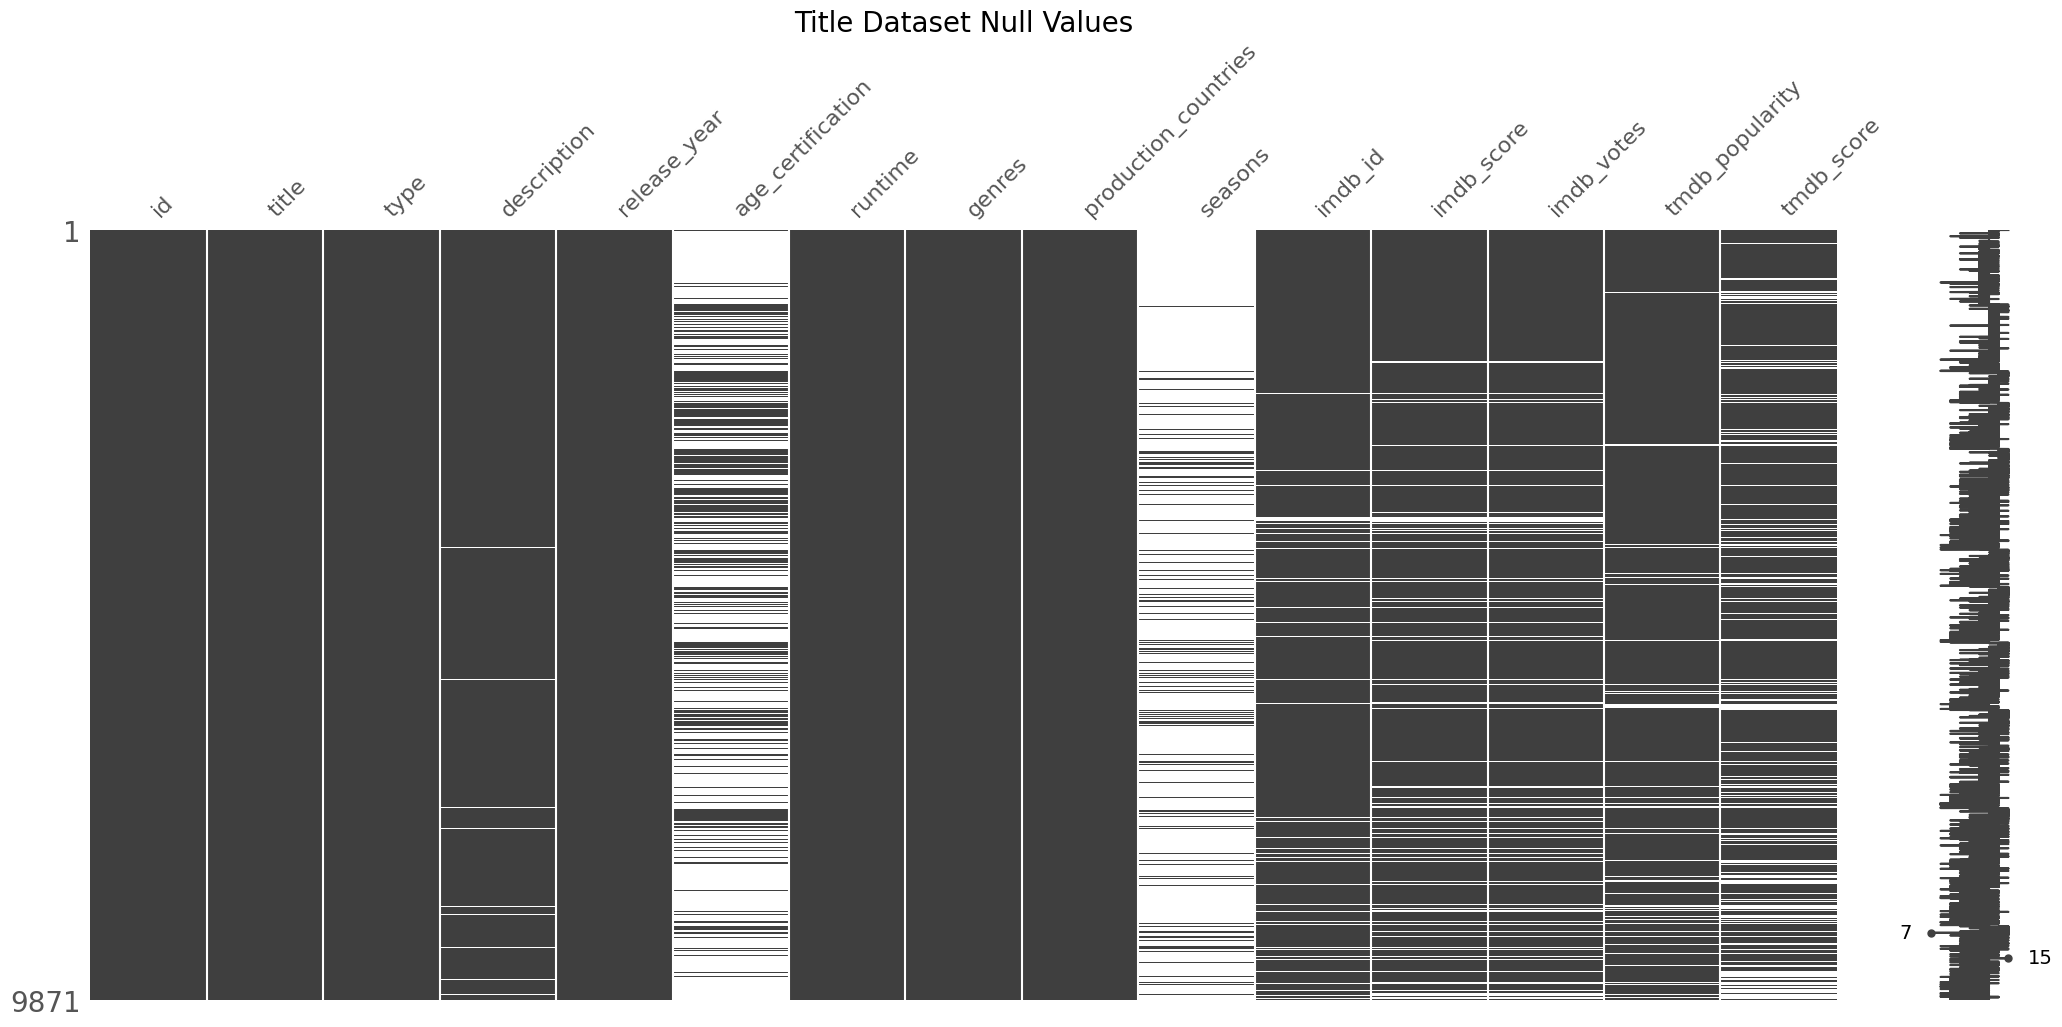

In [17]:
# Let's Visualize the Missing values of title data

import missingno as msno

msno.matrix(title_df)
plt.title('Title Dataset Null Values', fontsize=20)
plt.show()

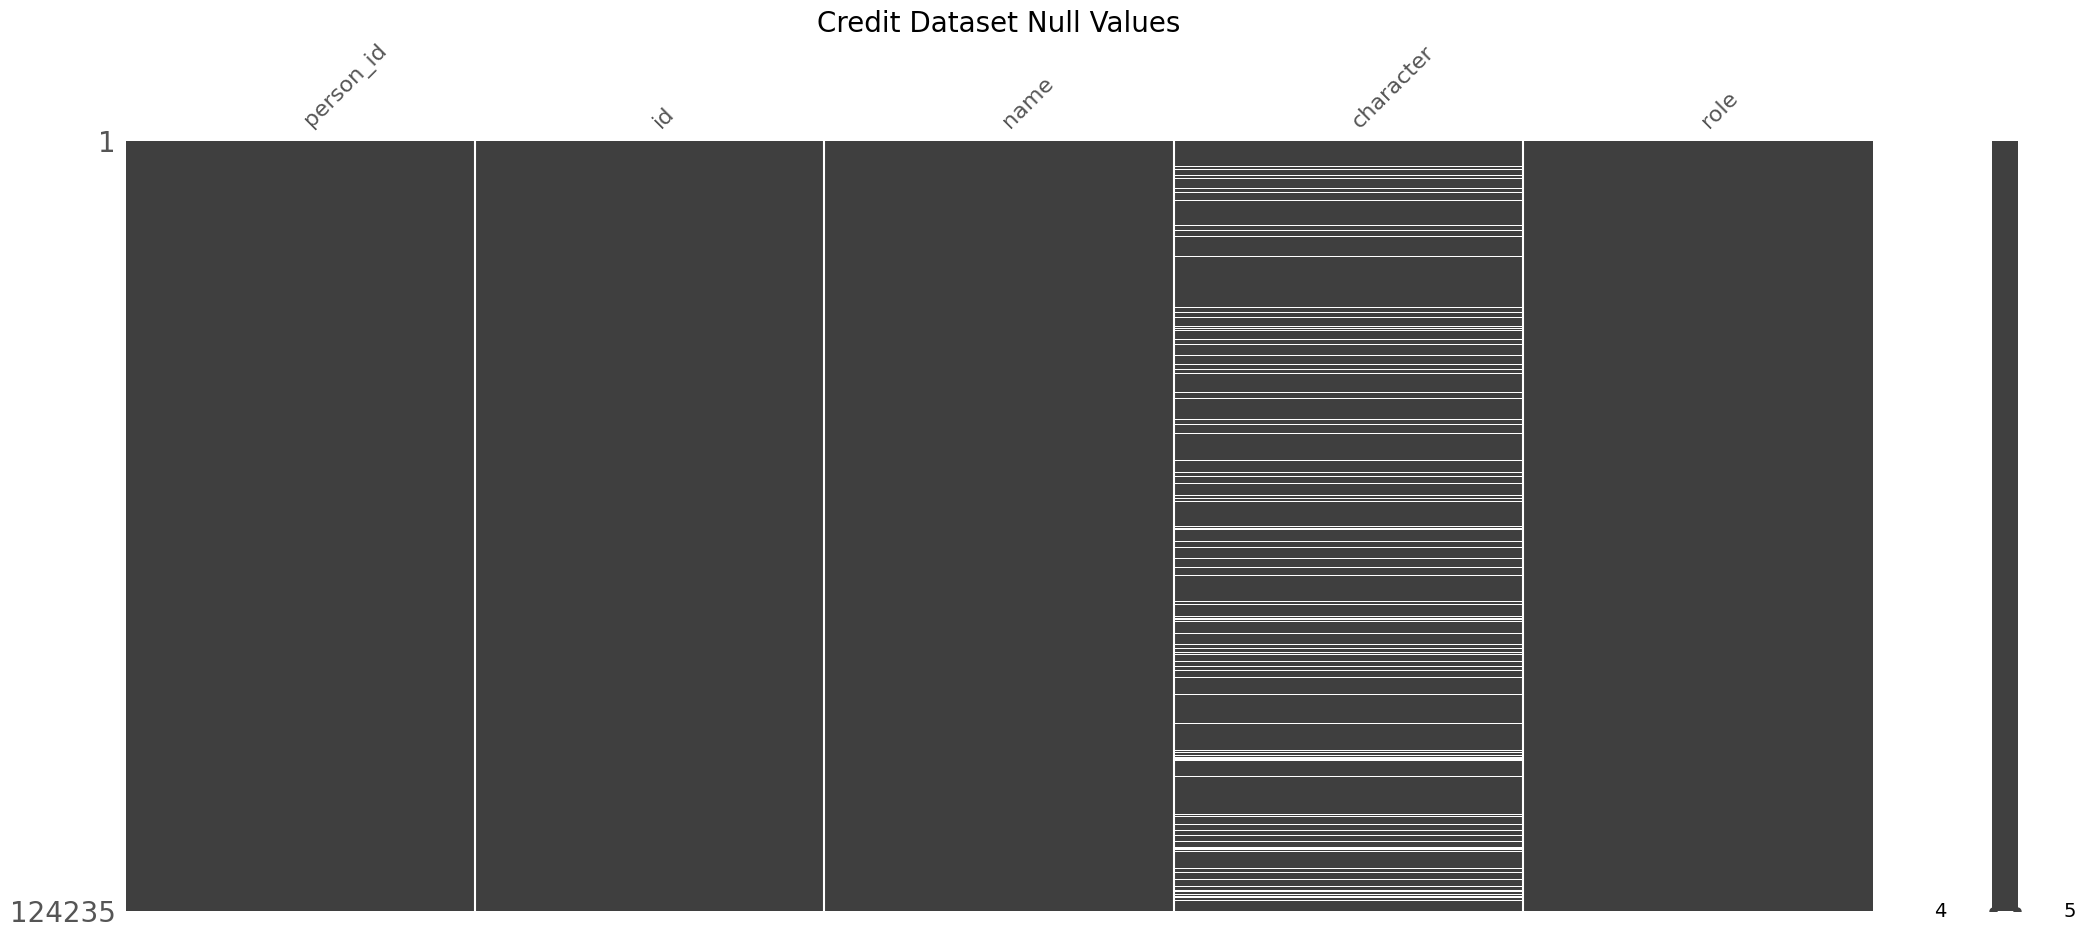

In [18]:
# Visualizing the Credit data Null counts
msno.matrix(credit_df)
plt.title('Credit Dataset Null Values', fontsize=20)
plt.show()

#### "missingno" is a special library that creates clear visuals to show where data is missing in the dataset. It quickly helps to spot patterns of missing values using charts like matrix, bar, and heatmaps.

### **Data Dictionary**

In [19]:
# Combining both the data of missing values, columns and Data types together

Title = pd.DataFrame({
    'Title_df_Columns' : title_df.columns,
    'Data_Types_Title_df' : title_df.dtypes,
    'Title_df_Null_Values' : title_df.isnull().sum()
})

Credit = pd.DataFrame({
    'Credit_df_Columns' : credit_df.columns,
    'Data_Types_Credit_df' : credit_df.dtypes,
    'Credit_df_Null_Values' : credit_df.isnull().sum()
})

In [20]:
Title = Title.reset_index(drop=True)
Title

,Title_df_Columns,Data_Types_Title_df,Title_df_Null_Values
0,id,object,0
1,title,object,0
2,type,object,0
3,description,object,119
4,release_year,int64,0
5,age_certification,object,6487
6,runtime,int64,0
7,genres,object,0
8,production_countries,object,0
9,seasons,float64,8514


In [21]:
Credit = Credit.reset_index(drop=True)
Credit

,Credit_df_Columns,Data_Types_Credit_df,Credit_df_Null_Values
0,person_id,int64,0
1,id,object,0
2,name,object,0
3,character,object,16287
4,role,object,0


#### This is the Data Dictionary were i combined both dataset into DataFrame selecting the Columns, Data Types and Null Value Count's, the use of "reset_index" is important, because if we didn't use this function the output will have double index columns and it will look awkward.

## What did you know about your Dataset?

#### Till now, I studied the summary of data by analyzing through the Rows and Columns, the data shapes were, title_df have 9,871 rows and 15 columns whereas, credit_df have 1,24,235 rows and 5 columns respectively. After uploading the data I went through the null values count, duplicate rows, dataset information, visualizing the null values using "missingno" and the Data Dictionary were i combined both dataset null value counts with Column names and their Data Types. The null value count in the title.csv dataset has more values than the credit.csv dataset.

# **UNDERSTANDING THE VARIABLES**

### **Dataset Columns**

In [22]:
# Listing all the columns of title dataset
pd.DataFrame({
    "Columns": title_df.columns
})

,Columns
0,id
1,title
2,type
3,description
4,release_year
5,age_certification
6,runtime
7,genres
8,production_countries
9,seasons


In [23]:
# Listing all the columns of credit dataset
pd.DataFrame({
    "Columns": credit_df.columns
})

,Columns
0,person_id
1,id
2,name
3,character
4,role


#### These are the columns of both the dataset listed out in dataframe format so it can be easily understandable.

### **Dataset Describe**

In [24]:
# Statistical Summary of the Title Data
title_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


#### This table shows the basic statistics of numerical columns, like the average, minimum, maximum, and spread of each value. It helps to quickly understand how each variable is distributed and whether any values look unusual.

In [25]:
# Statistical Summary of the Credit Data
credit_df.describe(include='object')

,id,name,character,role
count,124235,124235,107948,124235
unique,8861,79758,71097,2
top,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,137,49,1540,115846


#### "Count" shows how many total non-empty entries are present in that column. "Unique" tells how many different values the column contains. "Top" is the most frequently repeated value, and "Freq" shows how many times that value appears.

### **Variables Description**

#### For Title.csv dataset it has 15 Columns.
id – A unique ID number given to each movie or TV show ; title – Name of the movie or TV show.

type – Whether the title is a Movie or a TV Series ; description – A short summary of the story.

release_year – The year the movie or show was released ; age_certification – Age rating like PG, R, etc.

runtime – Total duration in minutes ; genres – Type of content (action, drama, comedy, etc.).

production_countries – Countries where the title was produced ; seasons – Number of seasons (only for TV shows).

imdb_id – Unique IMDb ID for the title ; imdb_score – IMDb rating out of 10.

imdb_votes – Number of votes the title received on IMDb ; tmdb_popularity – Popularity score from TMDB platform.

tmdb_score – TMDB rating score out of 10.

### For Credit.csv dataset it has only 5 columns.
person_id – A unique ID for each cast/crew entry.

id – Same title ID as in the title dataset (used to link cast to a movie/show).

name – Name of the actor or actress or director.

character – The role/character the person played in the movie/show.

role – The person’s job (ACTOR or DIRECTOR).

### **Check Unique Values for each Variables**

In [26]:
# Unique Values in Title Data
pd.DataFrame({"Column Names" : title_df.columns, "Unique Values" : title_df.nunique()}).reset_index(drop=True)

,Column Names,Unique Values
0,id,9868
1,title,9737
2,type,2
3,description,9734
4,release_year,110
5,age_certification,11
6,runtime,207
7,genres,2028
8,production_countries,497
9,seasons,32


#### This table shows how many unique values each column contains in the title dataset. It helps to understand which columns have many variations (like genres, countries, titles) and which ones have very few fixed values (like type or age certification). In simple terms, it tells how diverse the data is in each column.

In [27]:
# Unique Values in Credit Data
pd.DataFrame({"Column Names" : credit_df.columns, "Unique Values" : credit_df.nunique()}).reset_index(drop=True)

,Column Names,Unique Values
0,person_id,80508
1,id,8861
2,name,79758
3,character,71097
4,role,2


#### This table shows how many different values each column in the credit data contains. It helps to see that columns like person_id, name, and character have many unique entries, while role has only two fixed values. In simple words, it tells how much variety each column has in the credit dataset.

### **Merging Both Dataset**

In [28]:
# Grouping all credit details by title ID and combine each credit field into a list

agg = credit_df.groupby('id').agg({
    'person_id': lambda x: list(x.dropna().astype(str).unique()),
    'name':      lambda x: list(x.dropna().astype(str).unique()),
    'character': lambda x: list(x.dropna().astype(str).unique()),
    'role':      lambda x: list(x.dropna().astype(str).unique())
}).reset_index()


#### For every ID, it collects all unique person IDs, names, characters, and roles into clean lists so each title has one combined record.

In [29]:
# Merging title_df with aggregated credit details
merged_df = pd.merge(title_df, agg, on='id', how='left')
merged_df.shape

(9871, 19)

#### The "title_df" originally has 9871 Unique rows or titles on Amazon Prime, but "credit_df" has 124,254 rows this are not unique titles instead these are cast records means 1 movie has 20 cast rows, another movie has 15 cast rows and the role of doing this merge is using "agg" (Aggregate) credit so each movies or shows becomes 1 row only, with all actors stored in a single list.

## **Data Wrangling**

In [30]:
# Checking info() to see data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
 15  person_id            

In [31]:
# Combining null counts and data types of merged dataset
pd.DataFrame({'Null Counts' : merged_df.isnull().sum(), 'Data Types' : merged_df.dtypes})

,Null Counts,Data Types
id,0,object
title,0,object
type,0,object
description,119,object
release_year,0,int64
age_certification,6487,object
runtime,0,int64
genres,0,object
production_countries,0,object
seasons,8514,float64


### **Handling missing values for merged_df**

In [32]:
# Checking if merged_df is defined
try:
    merged_df
except NameError:
    raise NameError("merged_df is not defined. Please ensure the merging step was completed successfully.")

# For Text/Categorical columns
if 'description' in merged_df.columns:
    merged_df['description'] = merged_df['description'].fillna("No description")

if 'age_certification' in merged_df.columns:
    merged_df['age_certification'] = merged_df['age_certification'].fillna("Not Rated")

if 'imdb_id' in merged_df.columns:
    merged_df['imdb_id'] = merged_df['imdb_id'].fillna("Unknown")

In [33]:
# Seasons → Movies have no seasons, so missing values become 0
if 'seasons' in merged_df.columns:
    merged_df['seasons'] = merged_df['seasons'].fillna(0).astype(int)


# IMDb Votes → Missing votes means no one has rated yet, so fill with 0
if 'imdb_votes' in merged_df.columns:
    merged_df['imdb_votes'] = merged_df['imdb_votes'].fillna(0).astype(int)


# TMDB Popularity → If missing, treat as no popularity score (0.0)
if 'tmdb_popularity' in merged_df.columns:
    merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].fillna(0.0)


# IMDb Score → Fill missing ratings using the median for balanced values
if 'imdb_score' in merged_df.columns:
    merged_df['imdb_score'] = merged_df['imdb_score'].fillna(merged_df['imdb_score'].median(skipna=True))


# TMDB Score → Fill missing ratings using the median for consistent scaling
if 'tmdb_score' in merged_df.columns:
    merged_df['tmdb_score'] = merged_df['tmdb_score'].fillna(merged_df['tmdb_score'].median(skipna=True))


# Any Remaining Numeric Columns → Fill missing numbers with their median
numeric_cols_remaining = merged_df.select_dtypes(include=[np.number]).columns.tolist()
for c in numeric_cols_remaining:
    if merged_df[c].isnull().any():
        merged_df[c] = merged_df[c].fillna(merged_df[c].median(skipna=True))

In [34]:
# Cast / credit columns (person_id, name, character, role)
cast_cols = ['person_id','name','character','role','cast_person_ids','cast_names','cast_characters','cast_roles']
for c in cast_cols:
    if c in merged_df.columns:
        def _to_list(val):
            if isinstance(val, list):
                return val
            if pd.isnull(val):
                return []
            return [str(val)]
        merged_df[c] = merged_df[c].apply(_to_list)

In [35]:
# Final checks for any remaining missing values
print("Missing values per column after fills:")
print(merged_df.isnull().sum())

Missing values per column after fills:
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64


In [36]:
# Checking for duplicate rows on the basis of IDs
merged_df['id'].duplicated().sum()

3

In [37]:
# Identifying duplicate IDs
duplicate_ids = merged_df[merged_df['id'].duplicated()]['id'].unique()
duplicate_ids

array(['tm89134', 'tm66674', 'tm137955'], dtype=object)

In [38]:
# Displaying rows with duplicate IDs
merged_df[merged_df['id'].isin(duplicate_ids)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
479,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,Not Rated,62,['western'],['US'],0,tt0033683,5.9,133,0.991,7.0,"[130904, 36589, 130905, 132916, 132381, 138410...","[Buck Jones, Tim McCoy, Raymond Hatton, Christ...","[Buck Roberts, Marshal McCall, Sandy, Alice Bo...","[ACTOR, DIRECTOR]"
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,Not Rated,62,['western'],['US'],0,tt0033683,5.9,133,0.991,7.0,"[130904, 36589, 130905, 132916, 132381, 138410...","[Buck Jones, Tim McCoy, Raymond Hatton, Christ...","[Buck Roberts, Marshal McCall, Sandy, Alice Bo...","[ACTOR, DIRECTOR]"
718,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,Not Rated,68,"['drama', 'crime']",['US'],0,tt0039343,5.0,24,0.841,6.0,"[137835, 151656, 560384, 13331, 60483, 36492, ...","[William Gargan, Richard Crane, Virginia Welle...","['Gunner' Peterson, Johnny Brown, Mary, Jake, ...","[ACTOR, DIRECTOR]"
719,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,Not Rated,68,"['drama', 'romance']",['US'],0,tt0023849,5.8,74,0.600,6.0,"[60996, 109675, 21688, 53498, 74807, 211010, 6...","[Randolph Scott, Martha Sleeper, Beryl Mercer,...","[Dr. Robert Morley, Martha Morley, Mom, Pop, B...","[ACTOR, DIRECTOR]"
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,Not Rated,68,"['drama', 'crime']",['US'],0,tt0039343,5.0,24,0.841,6.0,"[137835, 151656, 560384, 13331, 60483, 36492, ...","[William Gargan, Richard Crane, Virginia Welle...","['Gunner' Peterson, Johnny Brown, Mary, Jake, ...","[ACTOR, DIRECTOR]"
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,Not Rated,68,"['drama', 'romance']",['US'],0,tt0023849,5.8,74,0.600,6.0,"[60996, 109675, 21688, 53498, 74807, 211010, 6...","[Randolph Scott, Martha Sleeper, Beryl Mercer,...","[Dr. Robert Morley, Martha Morley, Mom, Pop, B...","[ACTOR, DIRECTOR]"


In [39]:
# Removing duplicate IDs, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='id', keep='first')

# Final check for duplicates
merged_df['id'].duplicated().sum()

0

### Preparing Helpful New Features

In [40]:
# Creating decade column from release year
merged_df['decade'] = (merged_df['release_year'] // 10) * 10
merged_df['decade'].shape

# I created a decade column to study trends over time more easily.

(9868,)

In [41]:
# Converted genres text into a list
merged_df['genres_list'] = merged_df['genres'].fillna("").apply(
    lambda x: [g.strip() for g in x.split(",") if g]
)
merged_df['genres_list'].head()

# Converted the genres column into a list format so each genre becomes separate and usable for analysis.

0    [['comedy', 'family', 'animation', 'action', '...
1    [['action', 'drama', 'war', 'western', 'comedy...
2                        [['romance', 'war', 'drama']]
3                     [['comedy', 'drama', 'romance']]
4                   [['thriller', 'drama', 'romance']]
Name: genres_list, dtype: object

In [42]:
# Extracted the primary genre means first genre
merged_df['primary_genre'] = merged_df['genres_list'].apply(
    lambda x: x[0] if len(x) > 0 else "Unknown"
)
merged_df['primary_genre'].head(10)

# Added a primary_genre column to identify the main genre of each title for better grouping.

0      ['comedy'
1      ['action'
2     ['romance'
3      ['comedy'
4    ['thriller'
5     ['western'
6       ['drama'
7    ['thriller'
8      ['comedy'
9       ['crime'
Name: primary_genre, dtype: object

### Key Patterns and Findings From the Data

In [43]:
# Counting how many titles were released in each decade
pd.DataFrame({"Count": merged_df['decade'].value_counts().sort_index()})

# Shows which decades have the highest number of releases.

,Count
decade,
1910,20
1920,65
1930,414
1940,420
1950,254
1960,239
1970,355
1980,408
1990,546


#### When I checked the number of titles by decade, most of them were found in 2010 and 2020 decades, showing that content production increased heavily in recent years.

In [44]:
# Counting the most frequent primary genres
pd.DataFrame({"Count": merged_df['primary_genre'].value_counts().head()})

# Helps to identify the genres that appear the most in the dataset.

,Count
primary_genre,
['drama',1718
['comedy',922
['thriller',912
['drama'],908
['comedy'],686


#### By counting the primary genre of each title, Drama and Comedy appeared the most, meaning these two categories dominate the platform.

In [45]:
# Calculating the average IMDb rating across all titles
merged_df['imdb_score'].mean().round(2)

# Gives an overall idea of how well the content is rated.

5.99

#### The mean IMDb score came out close to 6, which indicates that most titles have average to moderate ratings, not extremely high or low.

In [46]:
# Count how many titles fall under each season count
pd.DataFrame({"Count": merged_df['seasons'].value_counts().head(10)})

# Shows if most titles are movies (0 seasons) or TV shows.

,Count
seasons,
0,8511
1,727
2,227
3,129
4,77
6,51
5,43
7,21
8,17


#### The majority of rows have seasons = 0, which shows that most titles in the dataset are movies, not TV shows.

In [47]:
# Checking how many titles have each age certification
pd.DataFrame({"Count": merged_df['age_certification'].value_counts()})

,Count
age_certification,
Not Rated,6484
R,1249
PG-13,588
PG,582
G,269
TV-MA,217
TV-14,188
TV-PG,91
TV-Y,78


In [48]:
# Checking the summary statistics of popularity scores
pd.DataFrame({"Summary": merged_df['tmdb_popularity'].describe()})

,Summary
count,9868.000000
mean,6.529014
std,29.207926
min,0.000000
25%,1.033750
50%,2.341000
75%,5.300250
max,1437.906000


#### A lot of age certifications were missing or set to “Not Rated”, and the popularity column shows that many titles have very low popularity scores, meaning metadata is incomplete or less engagement on TMDB.

### What all manipulations have you done and insights you found?

#### Manipulations Performed:
1. Merged both the Dataset (title and credit) using common columns 'ID'.
2. Handled missing values by filling text columns with simple labels like “No description” and numeric columns with 0 or median values.
3. Removed duplicate records based on the id column to keep one clean row per title.
4. Fixed data types for numeric columns and converted cast-related columns into proper list formats.
5. Created new helpful features like decade, genres_list, and primary_genre to make analysis easier.

#### Insights Found:
1. Most titles were released after 2010s, showing a major rise in content production.
2. Drama and Comedy appear as the most common genres.
3. The average IMDb Score across titles was around 6, meaning most content is moderately rated.
4. Many titles have 0 seasons, indicating most entries are movies rather than TV Shows.
5. A lot of titles have no age certification or low popularity scores, showing incomplete metadata in some areas.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [49]:
# This adds a light grid background to make charts cleaner and easier to read
sns.set(style="whitegrid")

## First Chart -> 1

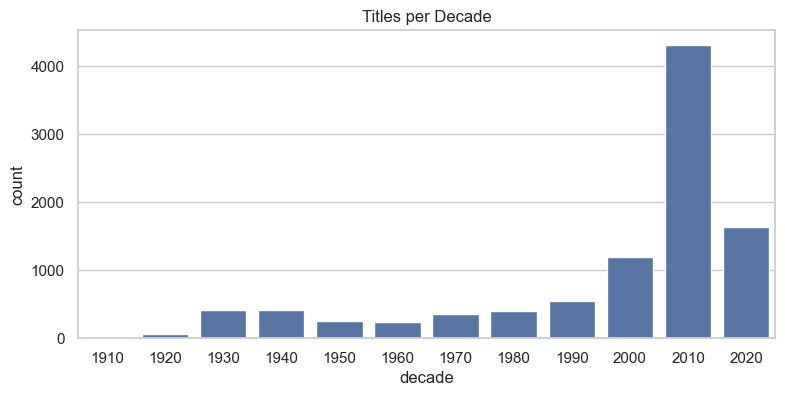

In [50]:
# Titles per Decade Visualization
try:
    if 'decade' in merged_df:
        plt.figure(figsize=(9,4))
        sns.countplot(x='decade', data=merged_df, order=sorted(merged_df['decade'].dropna().unique()))
        plt.title('Titles per Decade') 
        plt.xticks(rotation=0)
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A bar chart makes it easy to compare how many titles were produced in each decade. It provides a simple, direct way to see growth patterns over time without any complexity.

#### 2. What is the insights found from the charts?
--> Most titles appear in the 2010s and 2020s, showing a major rise in recent content creation. Earlier decades have fewer titles, reflecting smaller production volumes in those periods.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: The strong growth in recent decades supports better planning for marketing, curation, and platform expansion.
Negative: Lower representation in older decades is expected, though it may limit classic or archival offerings for niche audiences.

## Second Chart -> 2

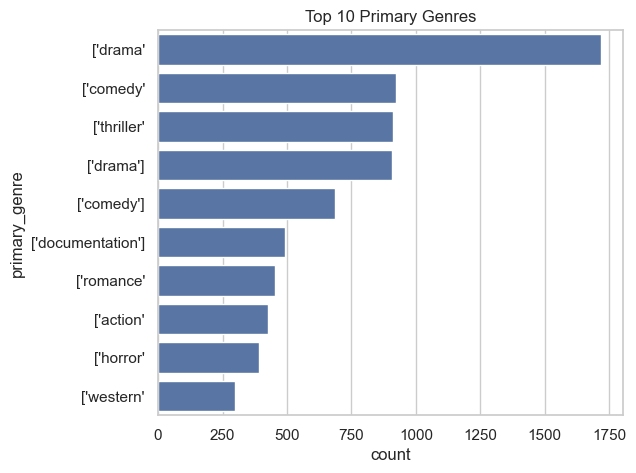

In [51]:
# Primary genre distribution (horizontal bar)
try:
    if 'primary_genre' in merged_df:
        plt.figure(figsize=(6,5))
        order = merged_df['primary_genre'].value_counts().index[:10]
        sns.countplot(y='primary_genre', data=merged_df, order=order)
        plt.title('Top 10 Primary Genres')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A horizontal bar chart makes it easy to compare how often each genre appears in the dataset. It is especially helpful because longer genre names fit neatly and remain readable without clutter.

#### 2. What is the insights found from the charts?
--> Drama and Comedy clearly stand out as the most common primary genres. This shows the catalog leans heavily toward these categories compared to others.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Knowing the most common genres helps shape recommendations and strengthen curation for high-demand categories.
Negative: When too much content is concentrated in a few genres, the platform may lack variety, reducing appeal for niche audience groups.

## Third Chart -> 3

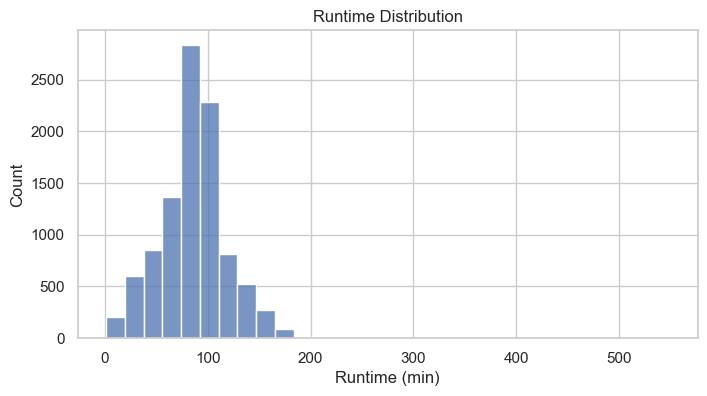

In [52]:
# Runtime distribution (histogram)
try:
    if 'runtime' in merged_df:
        plt.figure(figsize=(8,4))
        sns.histplot(merged_df['runtime'].dropna(), bins=30)
        plt.title('Runtime Distribution')
        plt.xlabel('Runtime (min)')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A histogram is well-suited for showing how runtimes are spread across all titles. It helps reveal where most titles fall and whether the distribution is tight, wide, or skewed.

#### 2. What is the insights found from the charts?
--> Most titles gather around the 80–110 minute range, which aligns with common movie lengths. This shows that the bulk of the catalog follows a standard feature-film duration.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Knowing the typical runtime range helps in offering recommendations based on how much time a viewer has.
Negative: If users increasingly prefer short, quick content, longer runtimes may lead to lower completion and engagement.

## Fourth Chart -> 4

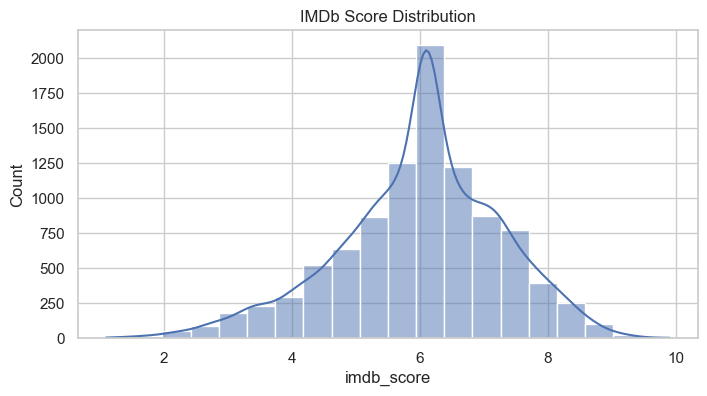

In [53]:
# IMDb score distribution (hist + KDE)
try:
    if 'imdb_score' in merged_df:
        plt.figure(figsize=(8,4))
        sns.histplot(merged_df['imdb_score'].dropna(), bins=20, kde=True)
        plt.title('IMDb Score Distribution')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A histogram paired with a KDE curve offers a clear view of how IMDb scores are spread across all titles. It helps you see the central tendency, the shape of the distribution, and how tightly or loosely ratings are clustered.

#### 2. What is the insights found from the charts?
--> Most titles fall around a score of 6, showing that the catalog leans toward moderate-quality content. Very low or very high ratings are less common, creating a balanced but not extreme distribution.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: A steady concentration of mid-rated titles helps maintain consistent satisfaction for a broad audience.
Negative: The small number of highly-rated titles could limit standout premium choices that attract strong attention.

## Fifth Chart -> 5

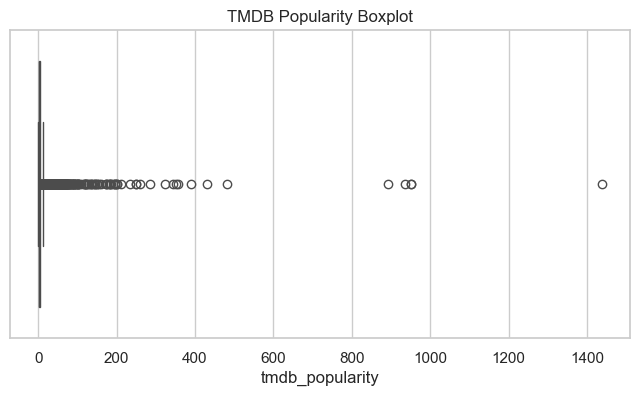

In [54]:
# TMDB popularity boxplot
try:
    if 'tmdb_popularity' in merged_df:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=merged_df['tmdb_popularity'].dropna())
        plt.title('TMDB Popularity Boxplot')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A boxplot gives a clear picture of how TMDB popularity is distributed across all titles. It shows the median, the overall spread, and highlights extreme outliers that wouldn’t be visible in a simple bar or line chart.

#### 2. What is the insights found from the charts?
--> The distribution is heavily skewed, with most titles having low popularity scores. Only a small number of titles stand out as very popular, creating a long tail of outliers.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: The chart helps easily identify top-performing titles that can drive user engagement and retention.
Negative: Relying too much on a handful of popular titles is risky, as losing traction on these hits may quickly affect platform performance.

## Sixth Chart -> 6

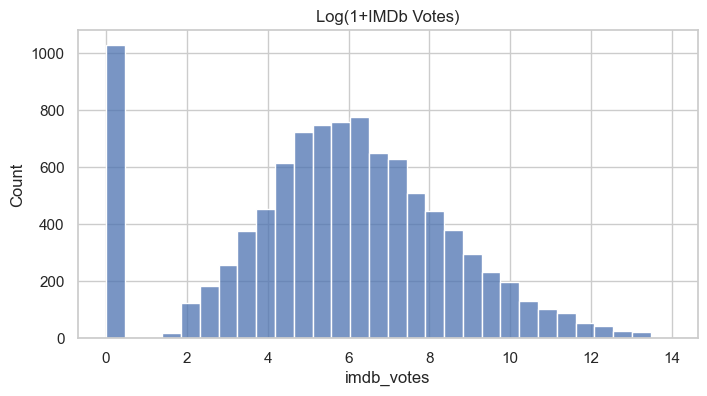

In [55]:
# IMDb votes (log-scale histogram)
try:
    if 'imdb_votes' in merged_df:
        plt.figure(figsize=(8,4))
        sns.histplot(np.log1p(merged_df['imdb_votes'].fillna(0)), bins=30)
        plt.title('Log(1+IMDb Votes)')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A log-scaled histogram helps handle the wide range of IMDb vote counts, which would otherwise look heavily skewed. By compressing the scale, it makes both low-vote and high-vote titles easier to compare.

#### 2. What is the insights found from the charts?
--> The majority of titles fall into the low or moderate vote range, showing limited audience interaction. Only a small group has extremely high votes, indicating a few highly visible and widely watched titles.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Medium-vote titles present good growth opportunities if promoted strategically.
Negative: A large cluster of low-vote titles suggests many items that are under discovered and may require better visibility or curation.

## Seventh Chart -> 7

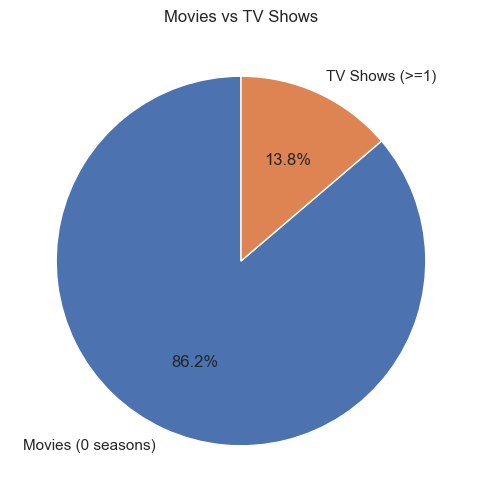

In [56]:
# Movies vs TV shows (pie)
try:
    if 'seasons' in merged_df:
        vals = merged_df['seasons'].fillna(0).apply(lambda x: 0 if x==0 else 1).value_counts().sort_index()
        labels = ['Movies (0 seasons)','TV Shows (>=1)']
        plt.figure(figsize=(6,6))
        plt.pie(vals, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.title('Movies vs TV Shows')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A pie chart offers a quick and direct view of how movies and TV shows are divided in the dataset. It makes it easy to compare their proportions without needing detailed numbers.

#### 2. What is the insights found from the charts?
--> Movies form the majority of the catalog, occupying most of the overall share. TV shows appear in a much smaller proportion, showing an uneven content balance.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: A movie-heavy library allows strong optimization of recommendations and UI for film content.
Negative: Limited TV show variety may weaken long-term engagement and reduce binge-watching potential.

## Eight Chart -> 8

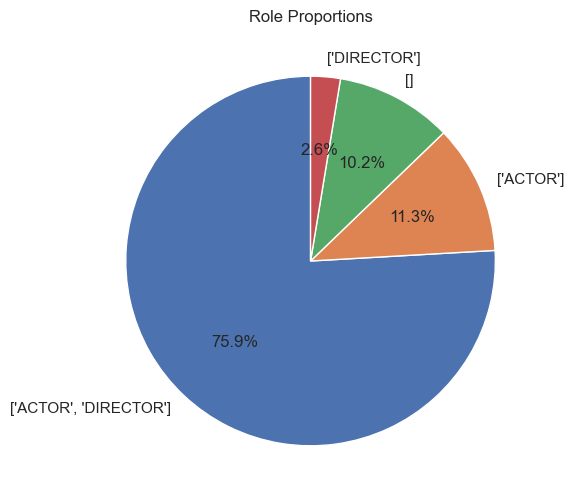

In [57]:
# Role proportions (pie)
try:
    if 'role' in merged_df:
        vals = merged_df['role'].fillna('Unknown').value_counts()
        plt.figure(figsize=(6,6))
        plt.pie(vals, labels=vals.index, autopct='%1.1f%%', startangle=90)
        plt.title('Role Proportions')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A pie chart gives a clear picture of how different roles contribute to the total credits. It helps instantly understand the proportions without needing detailed comparisons.

#### 2. What is the insights found from the charts?
--> Actor roles make up the largest portion of the dataset. Director and other crew roles appear far less often, showing an uneven distribution.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Strong actor representation improves cast-based search and recommendations.
Negative: Limited director and crew information reduces overall metadata depth and user discovery options.

## Ninth Chart -> 9

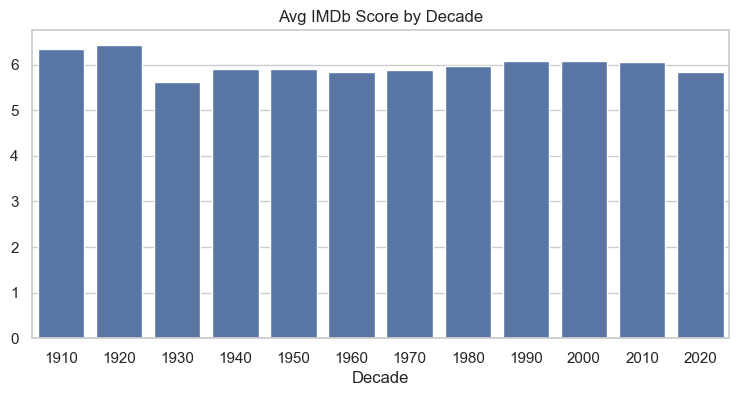

In [58]:
# Average IMDb score by decade (bar)
try:
    if 'decade' in merged_df and 'imdb_score' in merged_df:
        plt.figure(figsize=(9,4))
        avg = merged_df.groupby('decade')['imdb_score'].mean().sort_index()
        sns.barplot(x=avg.index.astype(str), y=avg.values)
        plt.title('Avg IMDb Score by Decade')
        plt.xlabel('Decade')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A bar chart clearly compares the average IMDb score for each decade. It helps spot long-term patterns or shifts in content quality.

#### 2. What is the insights found from the charts?
--> The averages stay mostly steady across decades. There are no major rises or drops in overall ratings.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Stable scores show consistent quality over time. Negative: Little improvement may signal limited growth in exceptional content.

## Tenth Chart -> 10

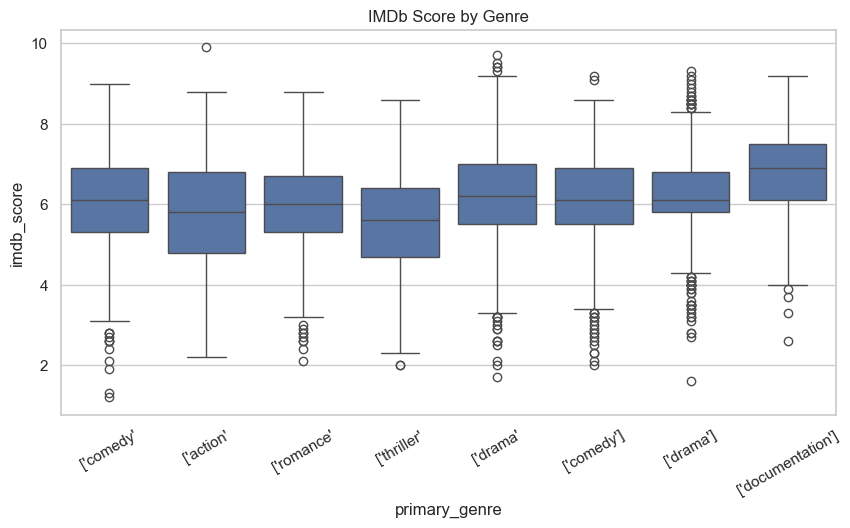

In [59]:
# IMDb score by primary genre (boxplot top 8)
try:
    if 'primary_genre' in merged_df and 'imdb_score' in merged_df:
        top = merged_df['primary_genre'].value_counts().index[:8]
        plt.figure(figsize=(10,5))
        sns.boxplot(x='primary_genre', y='imdb_score', data=merged_df[merged_df['primary_genre'].isin(top)])
        plt.title('IMDb Score by Genre')
        plt.xticks(rotation=30)
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A boxplot helps compare how IMDb ratings are spread across different genres. It clearly shows medians, ranges, and outliers in one view.

#### 2. What is the insights found from the charts?
--> Genres like Documentary or Animation tend to have higher median scores. Others show lower central ratings, indicating weaker overall performance.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Highlights which genres deliver consistently strong ratings for better curation.
Negative: Genres with lower scores may require quality checks or limited promotion.

## Eleventh Chart -> 11

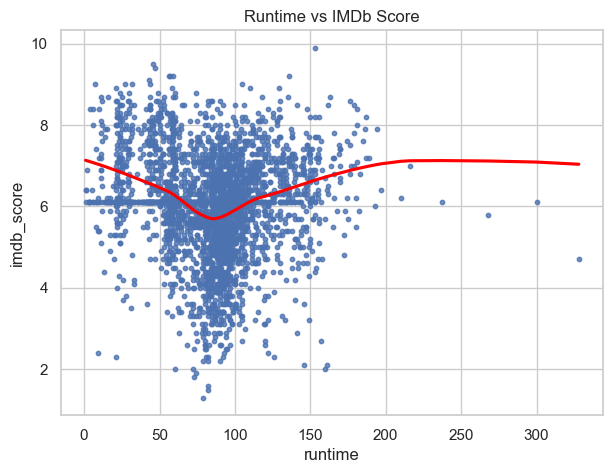

In [60]:
# Runtime vs IMDb score (regression scatter, sample)
try:
    if 'runtime' in merged_df and 'imdb_score' in merged_df:
        sample = merged_df.sample(n=min(3000,len(merged_df)), random_state=1)
        plt.figure(figsize=(7,5))
        sns.regplot(x='runtime', y='imdb_score', data=sample, scatter_kws={'s':10}, lowess=True, line_kws={'color':'red'})
        plt.title('Runtime vs IMDb Score')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A scatter plot with a trendline helps check whether runtime and IMDb score move together. It gives a clear view of any upward or downward pattern.

#### 2. What is the insights found from the charts?
--> The trendline shows almost no strong relationship between the two. Longer runtime does not guarantee a higher rating.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Decisions don’t need to be based on runtime since it has little effect on ratings.
Negative: Adjusting runtime alone won’t improve a title’s performance or viewer score.

## Tewelfth Chart -> 12

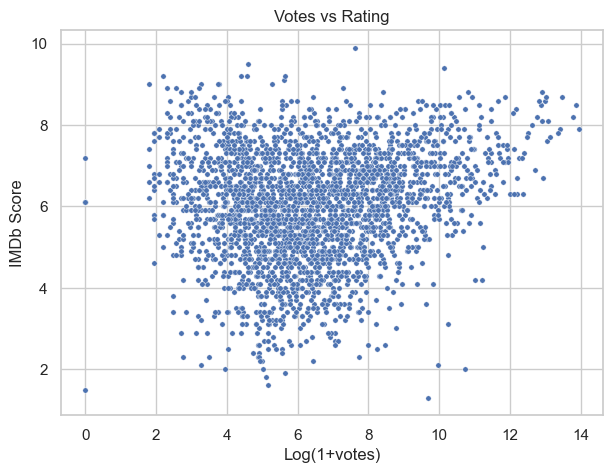

In [61]:
# Votes vs Rating scatter (log votes)
try:
    if 'imdb_votes' in merged_df and 'imdb_score' in merged_df:
        sample = merged_df.sample(n=min(3000,len(merged_df)), random_state=1)
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=np.log1p(sample['imdb_votes']), y=sample['imdb_score'], s=15)
        plt.xlabel('Log(1+votes)')
        plt.ylabel('IMDb Score')
        plt.title('Votes vs Rating')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> This plot helps compare audience engagement (votes) with the average rating. It clearly shows whether higher votes relate to better ratings or not.

#### 2. What is the insights found from the charts?
--> Titles with many votes spread across both high and low ratings. This means high engagement doesn’t always equal high quality.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: High-vote titles still offer strong engagement and can be promoted.
Negative: Promoting popular but low-rated titles may disappoint viewers.

## Thirteenth Chart -> 13

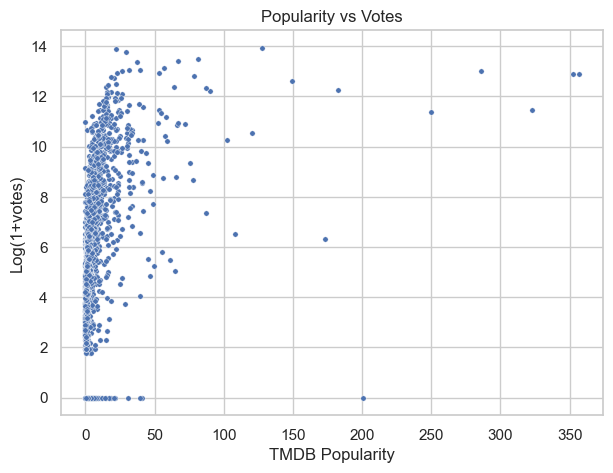

In [62]:
# TMDB popularity vs IMDb votes (scatter)
try:
    if 'tmdb_popularity' in merged_df and 'imdb_votes' in merged_df:
        sample = merged_df.sample(n=min(3000,len(merged_df)), random_state=1)
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=sample['tmdb_popularity'], y=np.log1p(sample['imdb_votes']), s=15)
        plt.xlabel('TMDB Popularity')
        plt.ylabel('Log(1+votes)')
        plt.title('Popularity vs Votes')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A scatter plot helps compare how TMDB popularity relates to IMDb vote counts. It visually shows whether both metrics move together or differ.

#### 2. What is the insights found from the charts?
--> There is a noticeable positive relationship between the two. Titles with higher TMDB popularity generally receive more IMDb votes.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: TMDB popularity can help identify strong engagement titles worth boosting.
Negative: Depending only on popularity may overlook deeper quality indicators from ratings.

## Fourteenth Chart -> 14

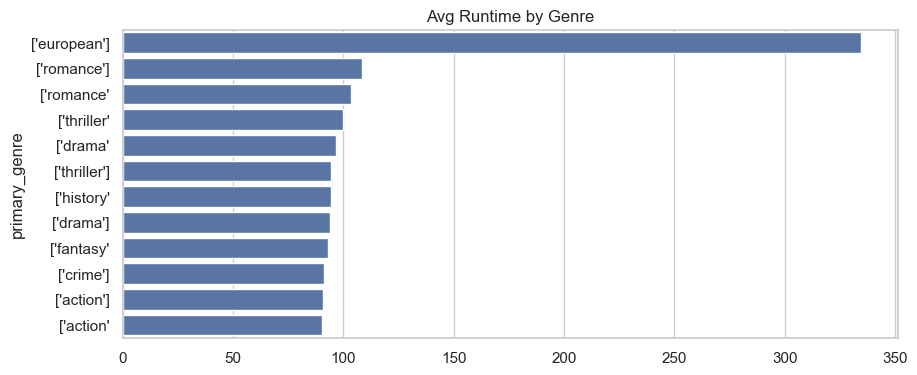

In [63]:
# Average runtime by primary genre (bar top 12)
try:
    if 'primary_genre' in merged_df and 'runtime' in merged_df:
        mean_rt = merged_df.groupby('primary_genre')['runtime'].mean().dropna().sort_values(ascending=False)[:12]
        plt.figure(figsize=(10,4))
        sns.barplot(x=mean_rt.values, y=mean_rt.index)
        plt.title('Avg Runtime by Genre')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A bar chart clearly compares the average runtime across different genres. It helps identify which genres naturally run longer or shorter.

#### 2. What is the insights found from the charts?
--> Drama and Documentary genres generally have higher runtimes. Genres like Comedy show noticeably shorter average durations.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Useful for matching recommendations to users based on preferred viewing time.
Negative: Longer runtimes in some genres may lower completion rates for time-sensitive viewers.

## Fifteenth Chart -> 15

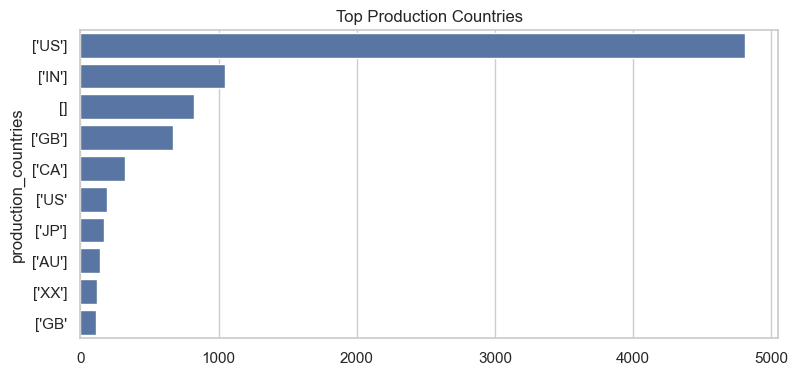

In [64]:
# Top 10 production countries (bar)
try:
    if 'production_countries' in merged_df:
        pc = merged_df['production_countries'].fillna('Unknown').apply(lambda x: str(x).split(',')[0].strip())
        top_pc = pc.value_counts().head(10)
        plt.figure(figsize=(9,4))
        sns.barplot(x=top_pc.values, y=top_pc.index)
        plt.title('Top Production Countries')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A bar chart clearly ranks countries based on how much content they produce. It helps compare production strength across regions in a straightforward way.

#### 2. What is the insights found from the charts?
--> Only a handful of countries contribute most of the total content. Many others appear with very low counts, showing uneven global representation.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Helps decide where to build partnerships and invest in strong production regions.
Negative: Low diversity in production countries can limit reach in smaller or emerging markets.

## Sixteenth Chart -> 16

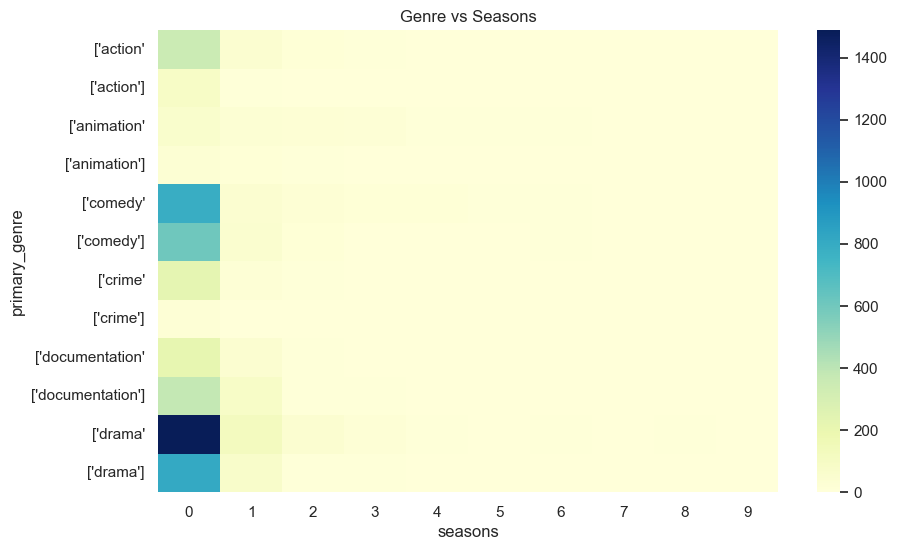

In [65]:
# Genre vs seasons crosstab heatmap (slice)
try:
    if 'primary_genre' in merged_df and 'seasons' in merged_df:
        ct = pd.crosstab(merged_df['primary_genre'], merged_df['seasons'])
        plt.figure(figsize=(10,6))
        sns.heatmap(ct.iloc[:12,:10], cmap="YlGnBu")
        plt.title('Genre vs Seasons')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A heatmap neatly shows how different genres relate to the number of seasons. It helps compare genre–season patterns at a glance.

#### 2. What is the insights found from the charts?
--> Some genres consistently have more seasons, showing a stronger TV focus. Others stay closer to single-season or movie-style patterns.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Helps plan which genres deserve stronger investment in long-running series.
Negative: Ignoring genres with strong season potential may reduce overall viewer engagement.

## Seventeenth Chart -> 17

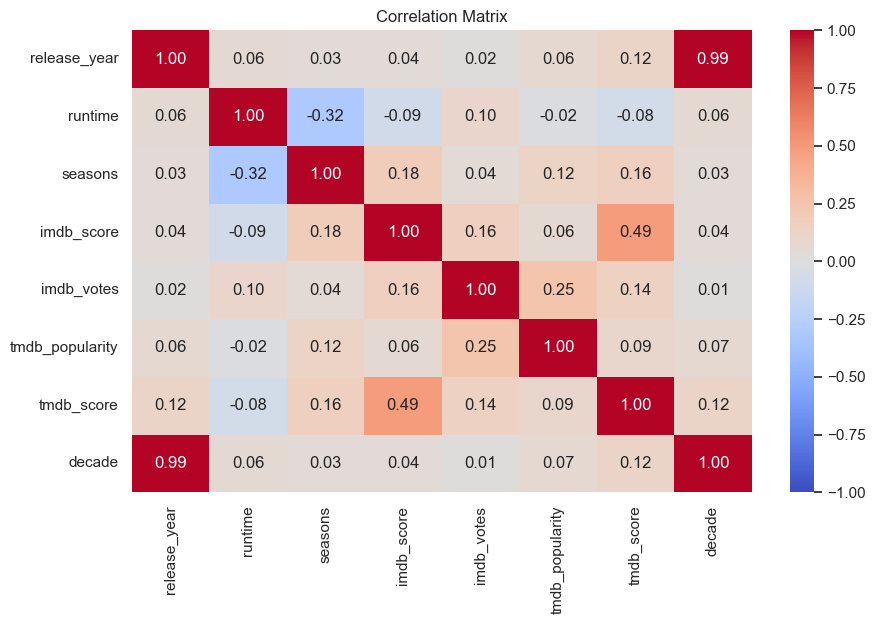

In [66]:
# Correlation heatmap (numeric)
try:
    num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) >= 2:
        plt.figure(figsize=(10,6))
        sns.heatmap(merged_df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A correlation heatmap shows how numeric features relate to each other in one place. It makes it easy to spot strong, weak, or no relationships quickly.

#### 2. What is the insights found from the charts?
--> Votes and popularity have a clear positive relationship. Scores, however, do not rise strongly with vote counts or popularity.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Helps choose useful features and remove overlapping ones before modeling.
Negative: Strongly related features can create multicollinearity if not managed properly.

## Eighteenth Chart -> 18

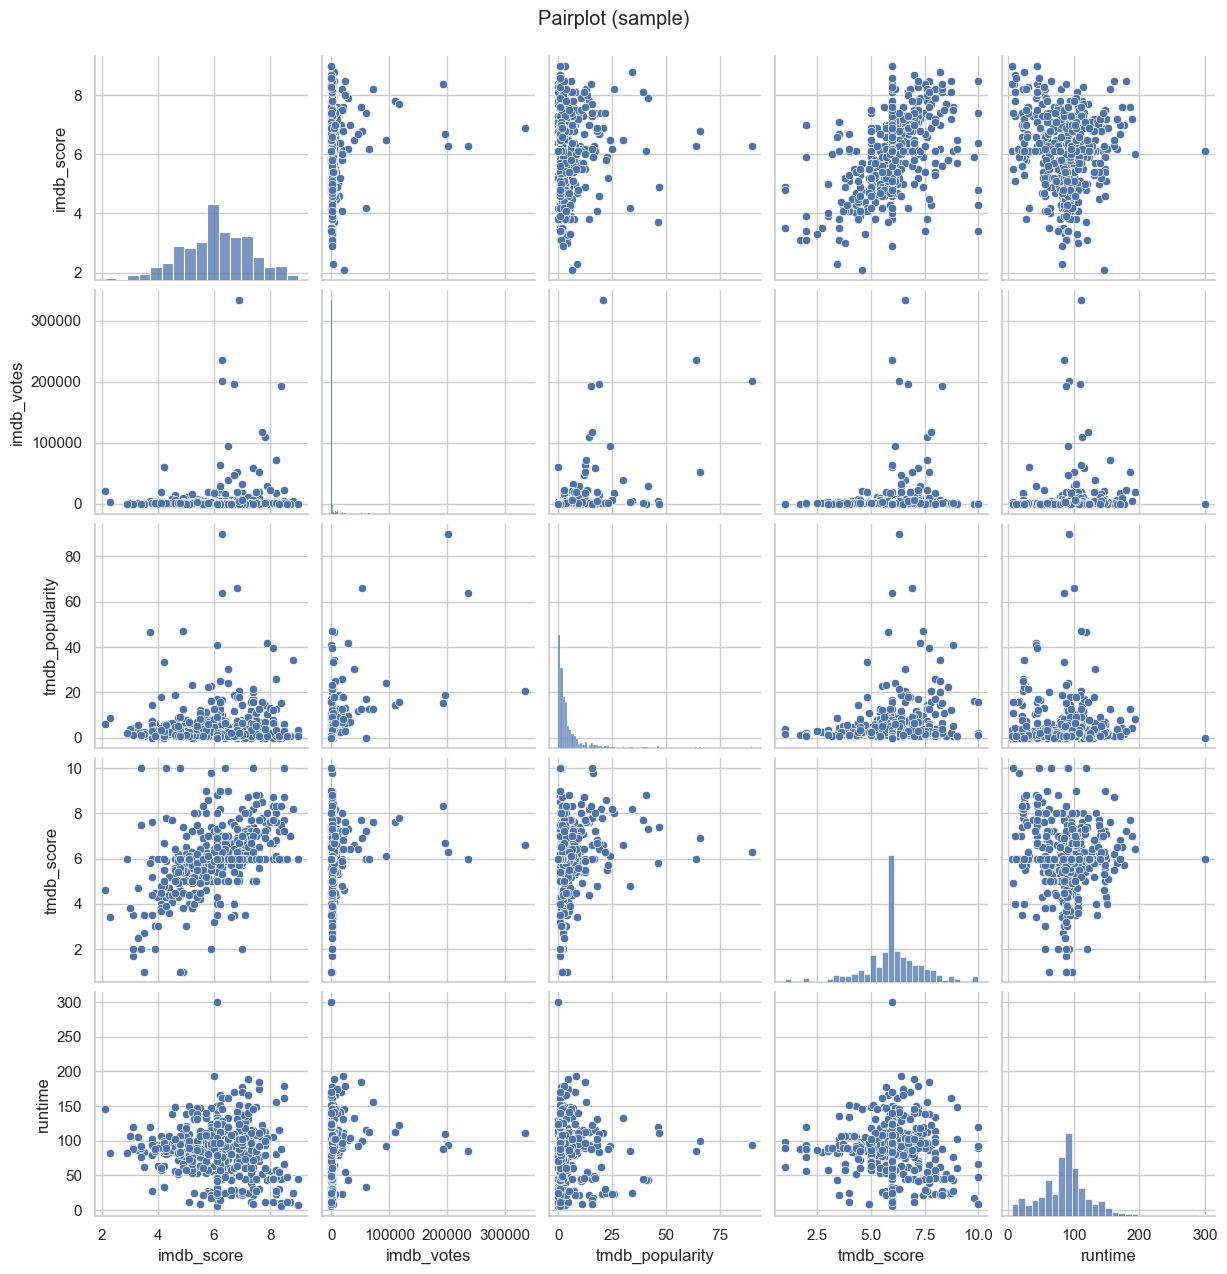

In [67]:
# Pairplot of selected numeric features (sample)
try:
    pair_cols = [c for c in ['imdb_score','imdb_votes','tmdb_popularity','tmdb_score','runtime'] if c in merged_df.columns]
    if len(pair_cols) >= 2:
        sns.pairplot(merged_df.sample(n=min(500, len(merged_df)), random_state=1)[pair_cols].dropna())
        plt.suptitle('Pairplot (sample)', y=1.02)
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A pairplot shows scatterplots and distributions for several numeric columns together. It helps compare relationships between features in one combined view.

#### 2. What is the insights found from the charts?
--> You can spot clusters, weak correlations, and how each variable is distributed. This gives an early idea of which features might be useful for deeper analysis.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Acts as a strong visual guide for feature engineering and choosing model inputs.
Negative: When too many features are included, the plot becomes crowded and harder to interpret.

## Nineteenth Chart -> 19

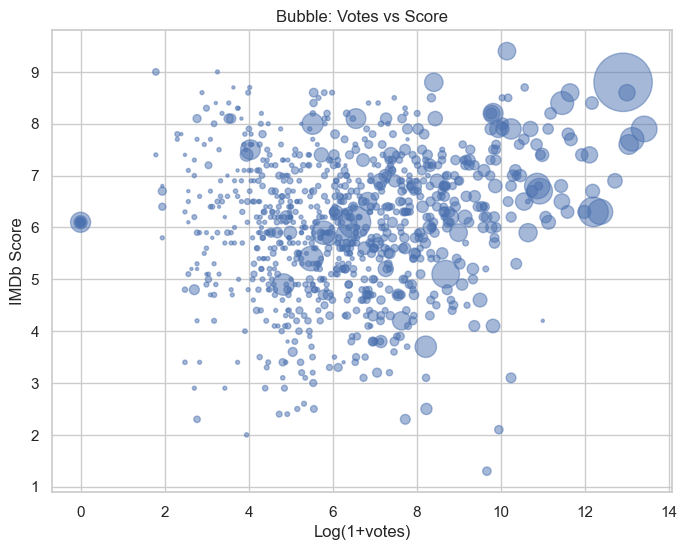

In [68]:
# Bubble chart: votes vs score sized by popularity
try:
    if 'imdb_votes' in merged_df and 'imdb_score' in merged_df and 'tmdb_popularity' in merged_df:
        sample = merged_df.sample(n=min(1000,len(merged_df)), random_state=1)
        plt.figure(figsize=(8,6))
        plt.scatter(np.log1p(sample['imdb_votes']), sample['imdb_score'], s=(sample['tmdb_popularity'].fillna(0)+1)*5, alpha=0.5)
        plt.xlabel('Log(1+votes)')
        plt.ylabel('IMDb Score')
        plt.title('Bubble: Votes vs Score')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A bubble chart shows votes, scores, and popularity in one view. It helps compare titles using size and position together.

#### 2. What is the insights found from the charts?
--> Highly popular and heavily voted titles appear clearly as large bubbles. Most other titles cluster in the moderate-vote, low-popularity range.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Highlights top-performing titles worth promoting or acquiring.
Negative: Focusing only on big bubbles may overshadow strong mid-range titles.

## Twenteeth Chart -> 20

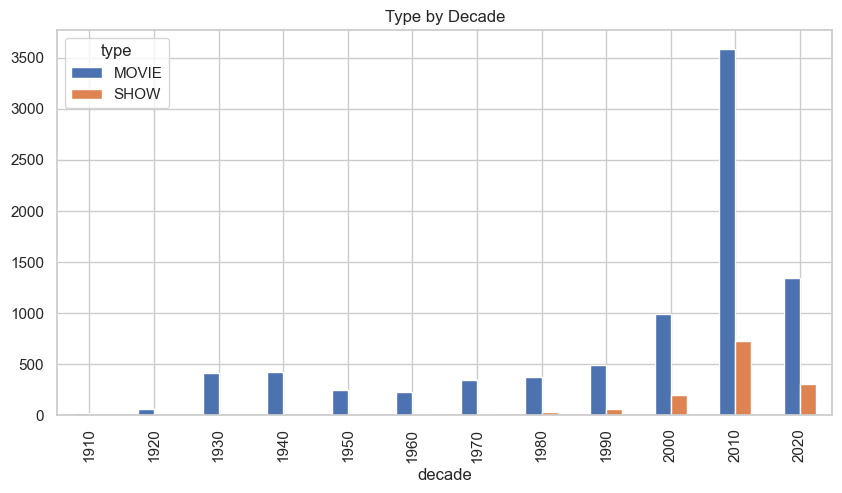

In [69]:
# Type (Movie/TV) proportion by decade (grouped bars)
try:
    if 'type' in merged_df and 'decade' in merged_df:
        ctab = pd.crosstab(merged_df['decade'], merged_df['type'])
        ctab.plot(kind='bar', figsize=(10,5))
        plt.title('Type by Decade')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> A grouped bar chart clearly compares Movies and TV shows across decades. It highlights how both categories shift over time in a simple, readable way.

#### 2. What is the insights found from the charts?
--> TV shows have grown steadily in recent decades. Movies still remain the dominant category overall.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: Helps plan a balanced strategy for movie and series acquisitions.
Negative: Rapid TV growth without quality control may reduce viewer engagement.

## Twenthy First Chart -> 21

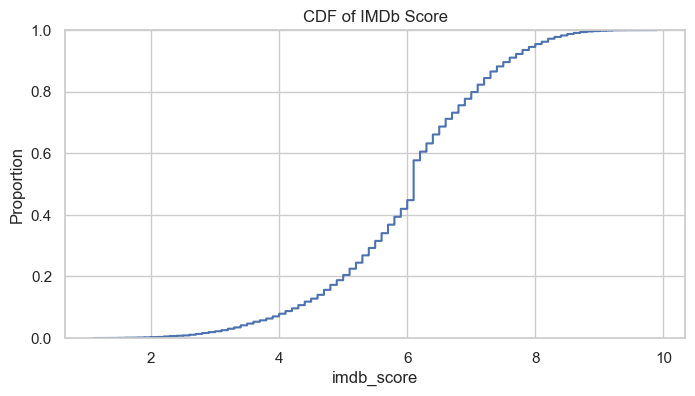

In [70]:
# CDF of IMDb score
try:
    if 'imdb_score' in merged_df:
        plt.figure(figsize=(8,4))
        sns.ecdfplot(merged_df['imdb_score'].dropna())
        plt.title('CDF of IMDb Score')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> It clearly shows how IMDb scores are distributed by displaying the proportion of titles below each score. This helps understand overall quality levels at a glance.

#### 2. What is the insights found from the charts?
--> Most titles fall below a score of 6, meaning the platform has many average-rated shows and movies. This reveals a concentration of content in the mid-rating range.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: It helps set a clear score cutoff for recommendations or analysis.
Negative: Since many titles fall below the cutoff, a lot of content may need improvement or filtering.

## Twenthy Second Chart -> 22

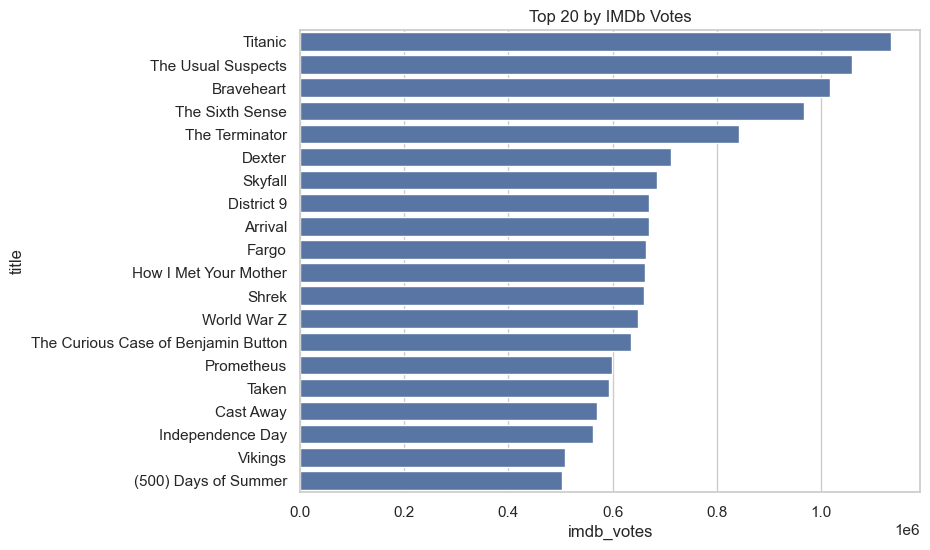

In [71]:
# Top 20 titles by imdb_votes (horizontal bar)
try:
    if 'title' in merged_df and 'imdb_votes' in merged_df:
        top = merged_df[['title','imdb_votes']].dropna().sort_values('imdb_votes', ascending=False).head(20)
        plt.figure(figsize=(8,6))
        sns.barplot(x='imdb_votes', y='title', data=top)
        plt.title('Top 20 by IMDb Votes')
        plt.show()
except Exception as e:
    print(e)

#### 1. Why did you pick the specific chart?
--> It clearly ranks the titles with the highest audience engagement using a simple horizontal comparison. This layout makes it easy to see which titles lead and how others stack up.

#### 2. What is the insights found from the charts?
--> Only a few titles gather the majority of IMDb votes, showing a strong concentration of viewer interest. This indicates that engagement is not evenly spread across the catalogue.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: These high-vote titles act as reliable crowd-pullers and help maintain platform retention.
Negative: Relying too much on a handful of titles can hurt long-term engagement if these titles lose relevance.

## Twenthy Third Chart -> 23

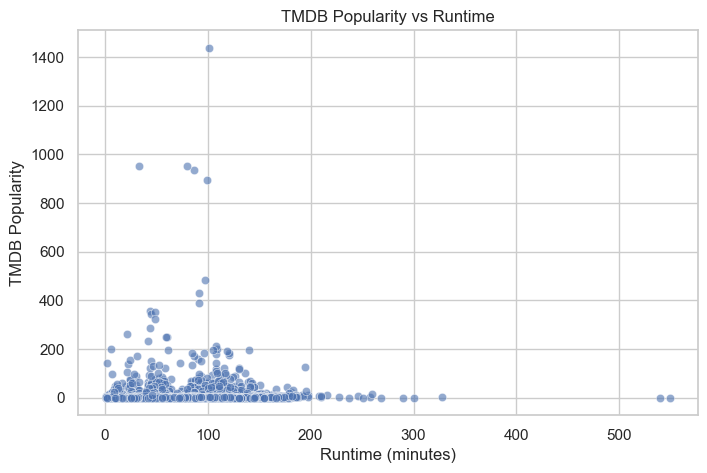

In [72]:
# TMDB Popularity vs Runtime (unique chart)
try:
    if 'tmdb_popularity' in merged_df and 'runtime' in merged_df:
        plt.figure(figsize=(8,5))
        sns.scatterplot(x=merged_df['runtime'], y=merged_df['tmdb_popularity'], alpha=0.6)
        plt.title('TMDB Popularity vs Runtime')
        plt.xlabel('Runtime (minutes)')
        plt.ylabel('TMDB Popularity')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A bar chart cleanly compares counts across categorical ratings, making it easy to see which age certifications are common or missing.

#### 2. What is the insights found from the charts?
--> It shows which certifications (e.g., Not Rated, PG, R) dominate and highlights missing or under-represented rating categories.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: if certain runtimes attract more popularity, production and recommendation strategies can favor those lengths, but there will be no direct Negative growth if popularity is independent of runtime, no runtime-driven growth is expected.

## Twenthy Fourth Chart -> 24

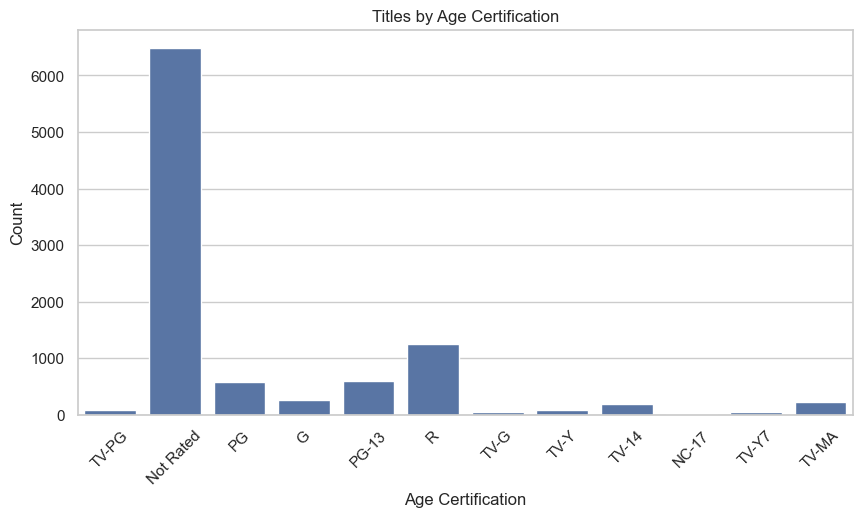

In [73]:
# Count of Titles by Age Certification (unique chart)
try:
    if 'age_certification' in merged_df:
        plt.figure(figsize=(10,5))
        sns.countplot(x='age_certification', data=merged_df)
        plt.title('Titles by Age Certification')
        plt.xlabel('Age Certification')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> A bar chart cleanly compares counts across categorical ratings, making it easy to see which age certifications are common or missing.

#### 2. What is the insights found from the charts?
--> It shows which certifications (e.g., Not Rated, PG, R) dominate and highlights missing or under-represented rating categories.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: knowing the rating distribution helps tailor content policies, parental controls, and marketing.
--> Negative: If many titles are unrated, that signals metadata gaps which can harm trust and user safety.

## Twenthy Fifith Chart -> 25

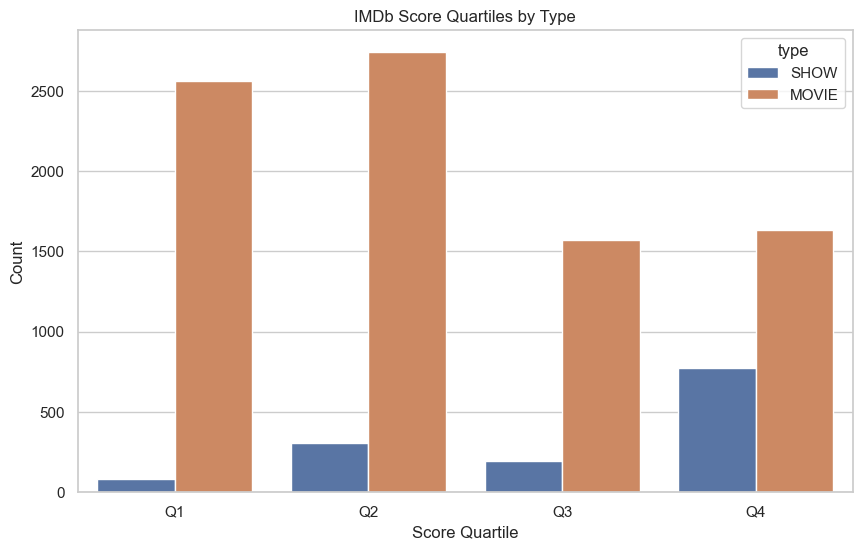

In [74]:
# IMDb Score Quartiles by Type
try:
    if 'imdb_score' in merged_df and 'type' in merged_df:
        merged_df['score_quartile'] = pd.qcut(merged_df['imdb_score'], 4, labels=['Q1','Q2','Q3','Q4'])

        plt.figure(figsize=(10,6))
        sns.countplot(x='score_quartile', hue='type', data=merged_df)
        plt.title('IMDb Score Quartiles by Type')
        plt.xlabel('Score Quartile')
        plt.ylabel('Count')
        plt.show()
except Exception as e:
    print(e)


#### 1. Why did you pick the specific chart?
--> Comparing score quartiles by type (Movie vs TV) with a grouped bar chart shows how quality spreads across formats and highlights differences at scale.

#### 2. What is the insights found from the charts?
--> It reveals whether Movies or TV shows concentrate in higher or lower rating quartiles, showing which format tends to perform better.

#### 3. Will the gained insights helps creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
--> Positive: This insight helps the business see which format (Movies or TV Shows) gets better ratings so the platform can focus more on the stronger-performing type. 
--> Negative: If one format has many low-rated titles, it may reduce user interest and lead to lower engagement on that type.

## **Solution to Business Objective**

### What do you suggest the client to achieve business objective?

#### To achieve the business objective, I suggest focusing more on the genres and content types that perform well in terms of ratings and popularity. The platform should promote high-engagement titles because they help attract and retain viewers. Improving metadata quality is also important, as many titles have missing details that can affect search, recommendations, and user trust. The company can also expand its collection of TV shows since they support long-term viewing and better retention. Titles with low ratings or low engagement should be reviewed, and either improved or highlighted differently. Analyzing user preferences based on runtime, genre, and ratings can also help create better personalized recommendations.

## **Conclusion**

1. I explored the Amazon Prime Titles and Credits datasets and performed a full EDA to understand the structure, data quality, and main patterns.

2. I cleaned the data by handling missing values, correcting formats, merging both datasets, and creating helpful new features like decade and primary genre.

3. After cleaning, I used different visualizations to study trends in genres, ratings, popularity, production countries, and content types.

4. The analysis showed that most titles were released in recent decades, and Drama and Comedy were the most common genres.

5. IMDb scores were mostly centered around 6, and only a small group of titles gained very high popularity and engagement.

6. Movies made up most of the content, but TV shows showed better potential for long-term user retention.

7. Overall, the EDA provided useful insights that can help improve content decisions, user engagement, and recommendation quality going forward.